# hola
> Aprende hola

- toc: true 
- badges: true
- comments: false


El método de Newton-Cotes es el método más sencillo. Sin embargo, hay algoritmos más sofisticados que utilizan el método del trapecio para generar estimaciones más precisas. Estos son:

*   Regla multiple trapezoidal (np.trapz)
*   Extrapolación de Richardson
* La integración de Romberg

**Regla multiple trapezoidal**

INSERTAR GRÁFICA

$f(x) \approx  P_2(X)$ (está en rojo en la gráfica)

Cada ounto se proyecta en e eje de la x formando un trapecios.

$I=\frac{h}{2} [f(x_0)+f(x_0+h)]+\frac{h}{2} [f(x_0+h)+f(x_0+2h)]+\frac{h}{2} [f(x_0+2h)+f(x_0+3h)]+...+\frac{h}{2} [f(x_0+(n-1)h)+f(x_0+(n)h)]$ 

**RMT** $I=\frac{h}{2} [f(x_0)+(2\sum _{i=1} ^{n-1}f(x_i))+f(x_n)]$

h de la función es diferente a la base 

Ejemplo de aplicación de la regla trapezoidal múltiple:

$I=\int_0 ^{1/2} cos \pi dx$

In [ ]:
import numpy as np

def getf(x):
   return np.cos(np.pi*x)

In [ ]:
def Int_mult_trapz(a,b,n):
  x=np.linspace(a,b,n)
  I=getf(a)+getf(b) #suma el valor de los extremos (x_0 y x_n)
  for i in range(1,n):
    I=I+2*getf(x[i])
  return ((b-a)*I/(2*n))

In [ ]:
Int_mult_trapz(0,0.5,100)

0.315120176198562

In [ ]:
1/np.pi

0.3183098861837907

In [ ]:
error=np.abs(Int_mult_trapz(0,0.5,100)-1/np.pi)*100/(1/np.pi)
error

1.0020769456676544

**Hacer gráfica de Log(error) vs log(#trapecios)**

#Cuadratura de Gauss

Disminuir el error cambiando la localización de los puntos de integración en la función. Se realiza un cambio de variable, se pasa de la dimensión de x a una dimensión z hipotética.

PONER GRÁFICAS

$A_T=\frac{h}{2}(f(a)+f(b)$

$A_T=w_1(f(a)+w_2f(b) \hspace{3cm} A_T=w_1f(z_1)+w_2f(z_2)$

$w_1=w_2=\frac{h}{2}$

Se intercambia el intervalo entre a y b por uno entre -1 y 1, encontrando un trapecio que pase por la función y la aproxime el área bajo la curva de la función. Se ajustan los primeros 4 polinomios al intervalo 

$f(z)=1$ $\hspace{1.2cm}\int_{-1}^1 1 dz=2 \hspace{1.4cm}2=w_1+w_2$

$f(z)=z$ $\hspace{1.2cm}\int_{-1}^1 z dz=0 \hspace{1.4cm}0=w_1z_1+w_2z_2$

$f(z)=z^2$ $\hspace{1cm}\int_{-1}^1 z^2 dz=\frac{2}{3} \hspace{1cm}\frac{2}{3}=w_1z_1^2+w_2z_2^2$

$f(z)=z^3$ $\hspace{1cm}\int_{-1}^1 z^3 dz=0 \hspace{1.2cm}0=w_1z_1^3+w_2z_2^3$

Resolviendo el sistema de ecuaciones:

$z_1=\frac{-1}{\sqrt3} \hspace{1cm} z_2=\frac{1}{\sqrt3} $

Por lo que el área bajo la curva estaría dada por:

$A_T=f_z(\frac{-1}{\sqrt3})+f_z(\frac{1}{\sqrt3})$

$x=\frac{(b+a)+(b-a)z}{2}$

$dx=\frac{b-a}{2}dz$

$I=\int_a ^b f(x)dx=\frac{b-a}{2}\int_{-1}^1 f_z(z)dz$







Los puntos y los pesos de Gauss para cuadraturas de tres-puntos, cuatro-puntos y cinco-puntos en el intervalo $x ϵ [−1,1]$.

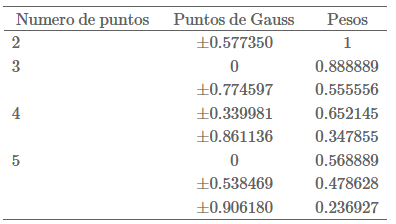

**Ejemplo de aplicación de la cuadratura de Gauss**

Implemente la cuadratura de Gauss para calcular la integral:

$I=(m+1)\int_0 ^1 x^m dx$

$I=1$  para cualquier m entero positivo

In [ ]:
import numpy as np

In [ ]:
def getf(x,m):
  I=(m+1)*x**m
  return I

In [ ]:
def integrate_gauss(xmin,xmax,n,m):
# xmin = lower bound for integral
# xmax = upper bound for integral
# n = order of Gauss quadrature
  if n==2:
    w = np.array([1, 1])
    x = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
  if n==3:
    w = np.array([5/9, 8/9, 5/9])
    x = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
  if n==4:
    a = np.sqrt(30)/36
    b = (2/7)*np.sqrt(6/5)
    c = np.sqrt(3/7 - b)
    d = np.sqrt(3/7 + b)
    w = np.array([0.5 + a, 0.5 + a, 0.5 - a, 0.5 - a])
    x = np.array([c, -c, d, -d])
  if n==5:
    a = 322/900
    b = 13*np.sqrt(70)/900
    c = 2*np.sqrt(10/7)
    d = np.sqrt(5 - c)/3
    e = np.sqrt(5 + c)/3
    w = np.array([128/225, a + b, a + b, a - b, a - b])
    x = ([0, d, -d, e, -e])
  if n<1 or n>5:
    print('Value of n is not valid')
    x = 0
    w = 0

  y=np.zeros(len(x))#cambio de variable
  for i in range (0,n):
    y[i] = ((xmax + xmin) + (xmax - xmin)*x[i])/2
  I = 0
  for i in range (0,n):
    I = I + w[i]*getf(y[i],m)
  return (xmax-xmin)*I/2

In [ ]:
integrate_gauss(0,1,2,1)

1.0

In [ ]:
integrate_gauss(0,1,2,3)

0.9999999999999999

In [ ]:
integrate_gauss(0,1,2,4)

0.9722222222222222

In [ ]:
from tabulate import tabulate

n=range(2,6)
m=range(1,6)
d=np.zeros([5,5])
e=np.zeros([5,5])

for i in n:
  for j in m:
    c=integrate_gauss(0,1,i,j)

    d[(i-1),(j-1)]=c

head=['m=1','m=2','m=3','m=4','m=5']
index=['n=1','n=2','n=3','n=4','n=5']

print("Tabla de aproximaciones de la integral")
print(tabulate(d,headers=head,showindex=index,numalign='center'))

Tabla de aproximaciones de la integral
      m=1    m=2    m=3     m=4       m=5
---  -----  -----  -----  --------  --------
n=1    0      0      0       0         0
n=2    1      1      1    0.972222  0.916667
n=3    1      1      1       1         1
n=4    1      1      1       1         1
n=5    1      1      1       1         1


In [ ]:
from scipy import integrate
m=5
f=lambda x: (m+1)*x**m
integrate.quadrature(f,0.0,1.0)

(0.9999999999999998, 4.440892098500626e-16)